In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('food.csv')
x=data.iloc[:,1:3].values
print(x)
y=data.iloc[:,3].values
print(y)

[[10  9]
 [ 1  4]
 [10  1]
 [ 7 10]
 [ 3 10]
 [ 1  1]
 [ 2  8]
 [ 3  1]
 [ 8  5]
 [ 3  7]
 [ 1  9]
 [ 3  6]
 [ 7  3]
 [10  7]
 [ 2  3]]
['fruit' 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'vegetable'
 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'fruit' 'fruit'
 'protein']


In [27]:
le=LabelEncoder()
y_new=le.fit_transform(y)
print(y_new)

x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=.25,random_state=25)




[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]


In [31]:
print(y_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
print("------Test Class------\n",y_test)
print("------Predict Class-----\n",y_predict)

print(knn.predict_proba(x_test))

print(accuracy_score(y_test,y_predict,normalize=False))


[0 0 0 2]
------Test Class------
 [0 0 0 2]
------Predict Class-----
 [0 1 0 2]
[[0.4 0.2 0.4]
 [0.4 0.6 0. ]
 [0.4 0.2 0.4]
 [0.2 0.2 0.6]]
3


[[2 1 0]
 [0 0 0]
 [0 0 1]]


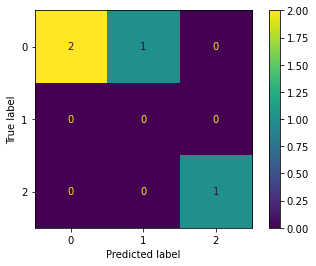

In [39]:
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)

cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()